In [6]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import scipy
import pickle
%matplotlib inline
#%matplotlib qt
import preprocessing as prep
from epoch_connectivity import ConnEEG as cnegg
from epoch_connectivity import ConnectionMatrices as cm


from epoch_connectivity.utils import FrequencyBand, only_EEG_channels

import mne_connectivity as mnecon

In [8]:
mne.set_log_level(verbose='WARNING')

epoched = prep.open_preprocessed_epoched(1, weaning=False)

a = (epoched[0]).copy()
#a.drop_channels(['ECG1', 'ECG2'])
sampling_frequency = a.info['sfreq']
b = (a.get_data())[0]

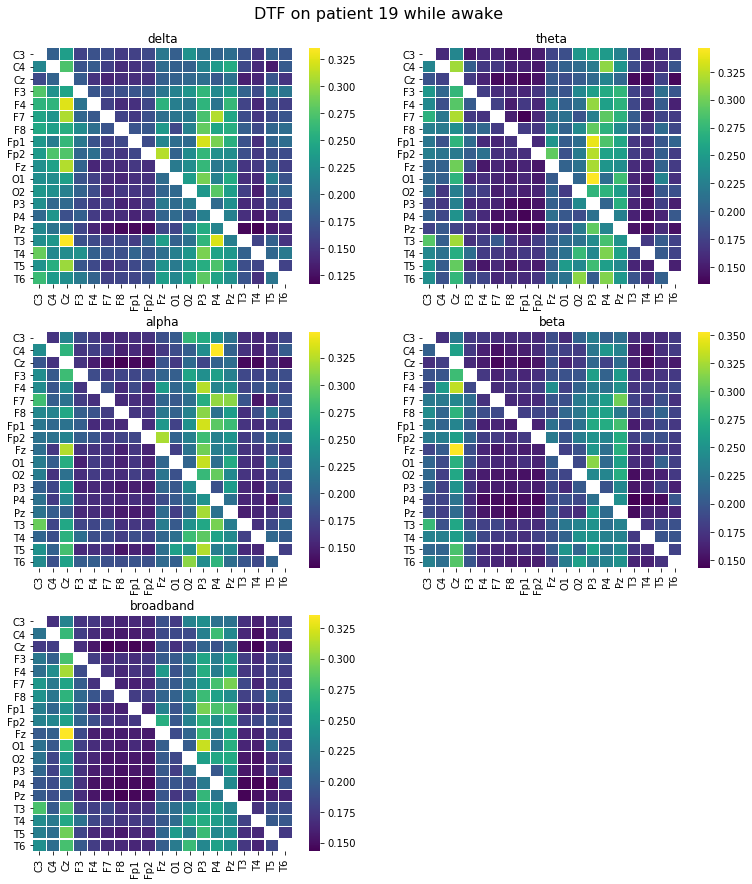

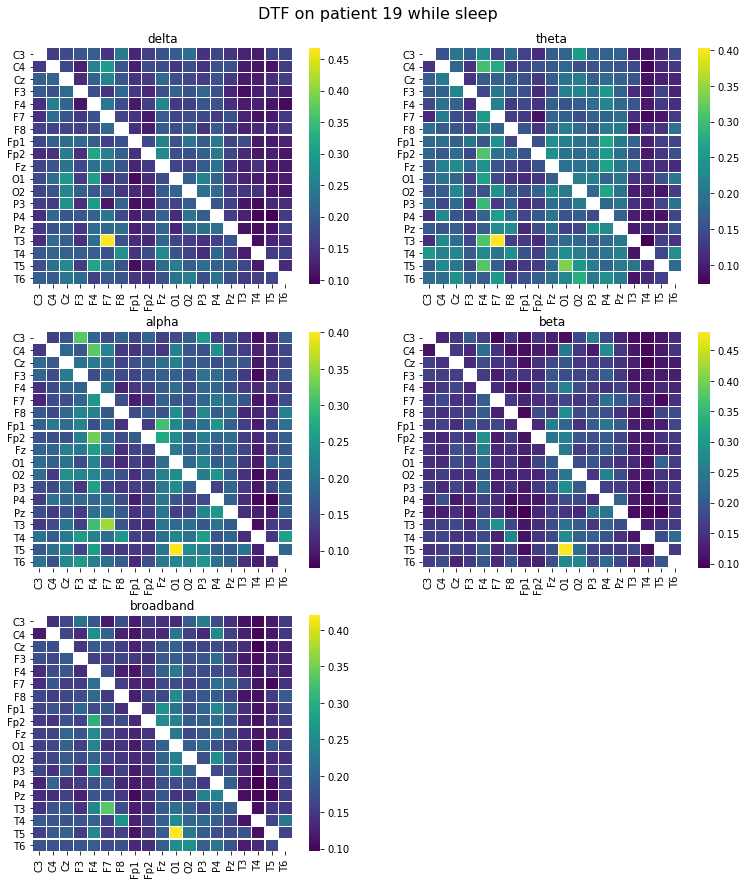

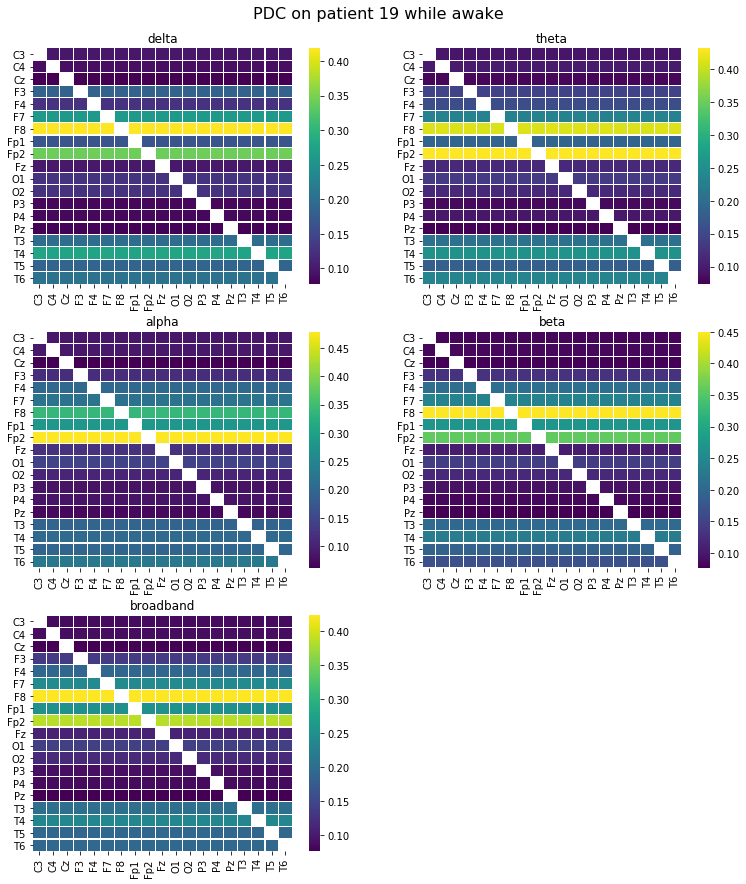

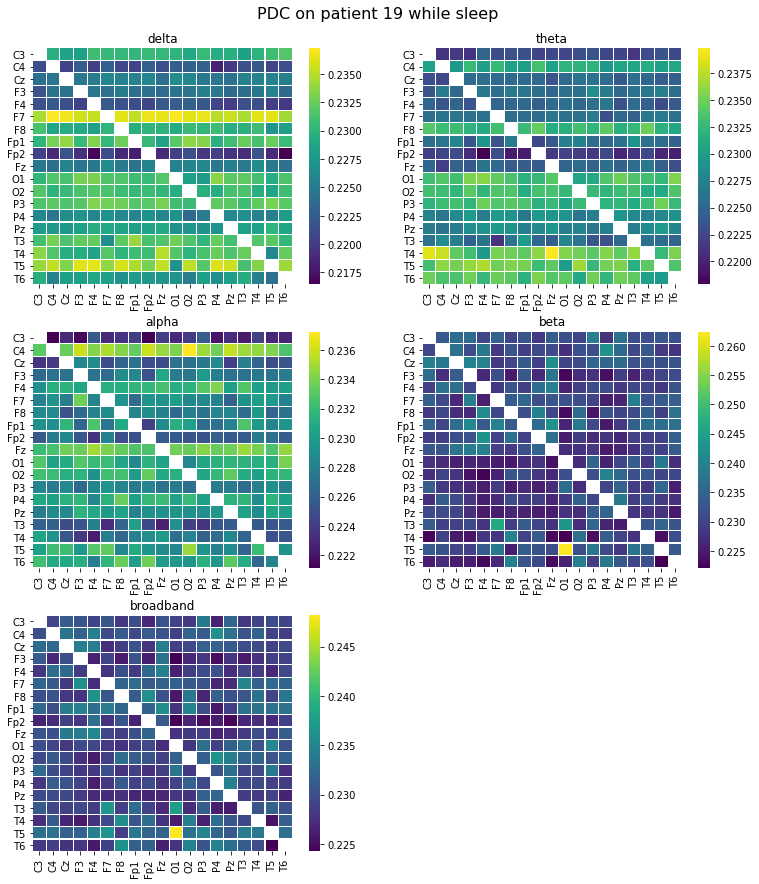

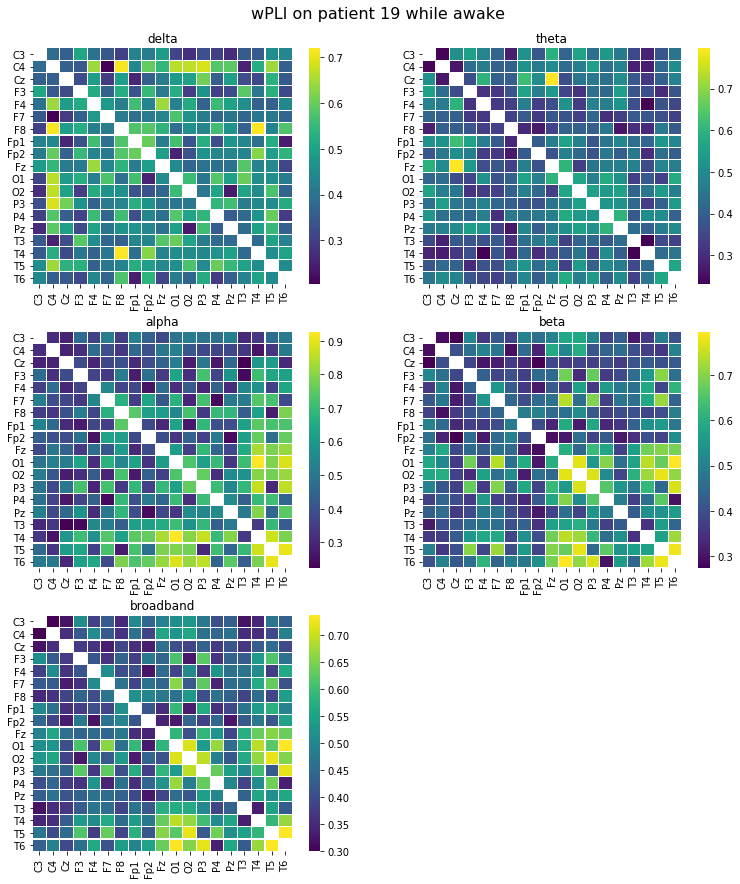

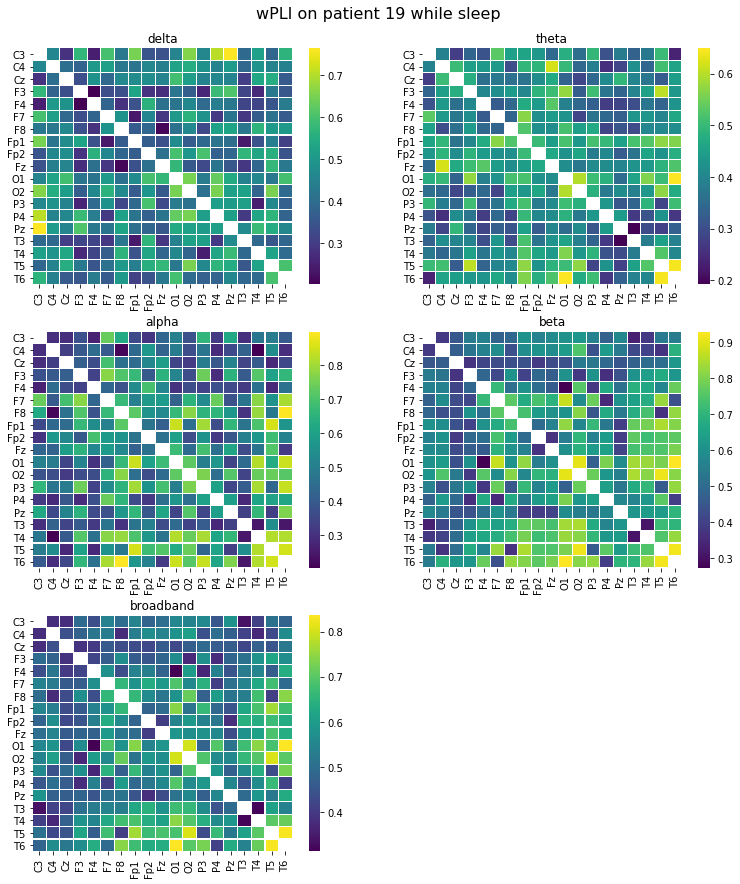

In [22]:
direc = 'C:/code_thesis/brain_connectivity_epilepsy/plots/'
direc_pickle = 'C:/code_thesis/brain_connectivity_epilepsy/connection_matrices/'

PAT_metadata = {'PAT1':False, 'PAT2':False, 'PAT3':False, 'PAT4':True, 'PAT5':False, 'PAT6':True,
               'PAT7':True, 'PAT8':False, 'PAT9':True, 'PAT10':True, 'PAT11':True, 'PAT12':True,
               'PAT13':True, 'PAT14':False, 'PAT15':False, 'PAT16':False, 'PAT17':False, 'PAT18':False,
               'PAT19':True, 'PAT20':True, 'PAT21':True, 'PAT22':True}
to_process = [1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 15, 16, 17, 18, 19]
#to_process = [19]

for pat_num in to_process:
    patient_code = 'PAT'+str(pat_num)
    weaning = PAT_metadata[patient_code]
    epoched = prep.open_preprocessed_epoched(pat_num, weaning=weaning)
    a_awake, a_sleep = (epoched[0]).copy(), (epoched[1]).copy()
    cm_awake = cm.ConnectionsMatrices(a_awake, patient_number=pat_num, rec_status='awake')
    cm_sleep = cm.ConnectionsMatrices(a_sleep, patient_number=pat_num, rec_status='sleep')
    pickle.dump(cm_awake, open(direc_pickle+patient_code+'_'+'AWAKE.pickle', 'wb'))
    pickle.dump(cm_sleep, open(direc_pickle+patient_code+'_'+'SLEEP.pickle', 'wb'))
    for measure in ['DTF', 'PDC', 'wPLI']:
        cm_awake.plot_fbands_hmaps(measure=measure, hide_diag=True, savefigure=True, directory=direc)
        cm_sleep.plot_fbands_hmaps(measure=measure, hide_diag=True, savefigure=True, directory=direc)

In [38]:
pat_num = 5
patient_code = 'PAT'+str(pat_num)
cm = pickle.load(open(direc_pickle+patient_code+'_'+'AWAKE.pickle', 'rb'))
cm.fit_quality

,REV mean,REV std,REV max,REV min
0,0.000038,0.000041,0.000470,7.321327e-07
1,0.000049,0.000045,0.000374,1.794242e-06
2,0.000021,0.000023,0.000291,6.896652e-07
3,0.000022,0.000023,0.000220,5.195600e-07
4,0.000021,0.000025,0.000345,4.476342e-07
5,0.000025,0.000029,0.000515,6.812799e-07
6,0.000032,0.000034,0.000411,1.181230e-06
7,0.000036,0.000038,0.000329,9.900918e-07
8,0.000024,0.000023,0.000255,6.489107e-07


In [9]:
CM = cm.ConnectionsMatrices(a, patient_number=1, rec_status='awake')

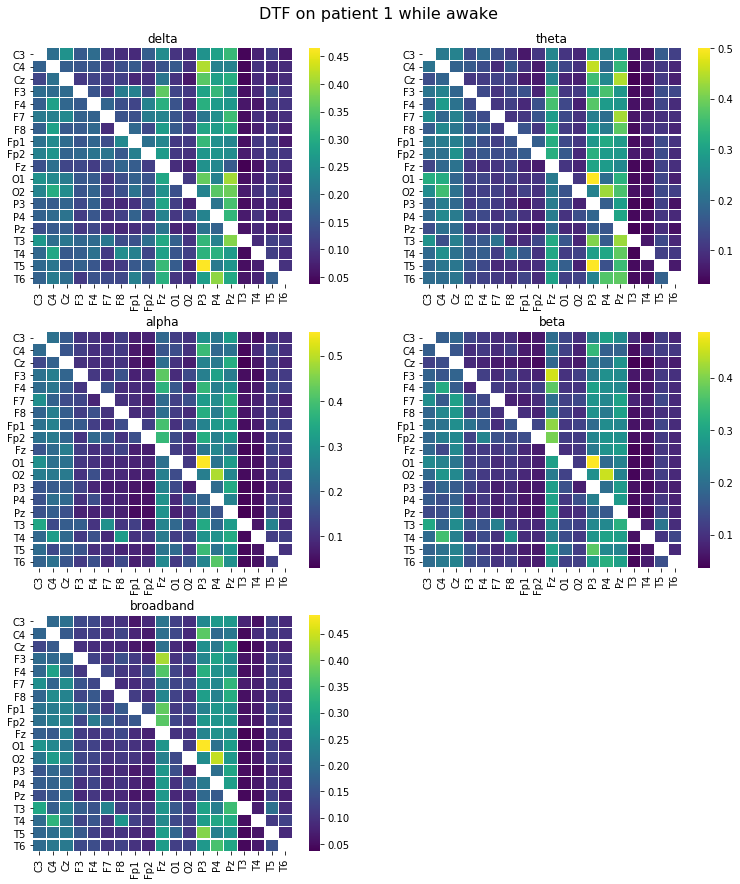

In [11]:
direc = 'C:/code_thesis/brain_connectivity_epilepsy/plots/'
CM.plot_fbands_hmaps(measure='DTF', hide_diag=True, savefigure=True, directory=direc)

In [ ]:
direc = 'C:/code_thesis/brain_connectivity_epilepsy/plots/'
CM.plot_fbands_hmaps(measure='DTF', hide_diag=True, savefigure=True, directory=direc)

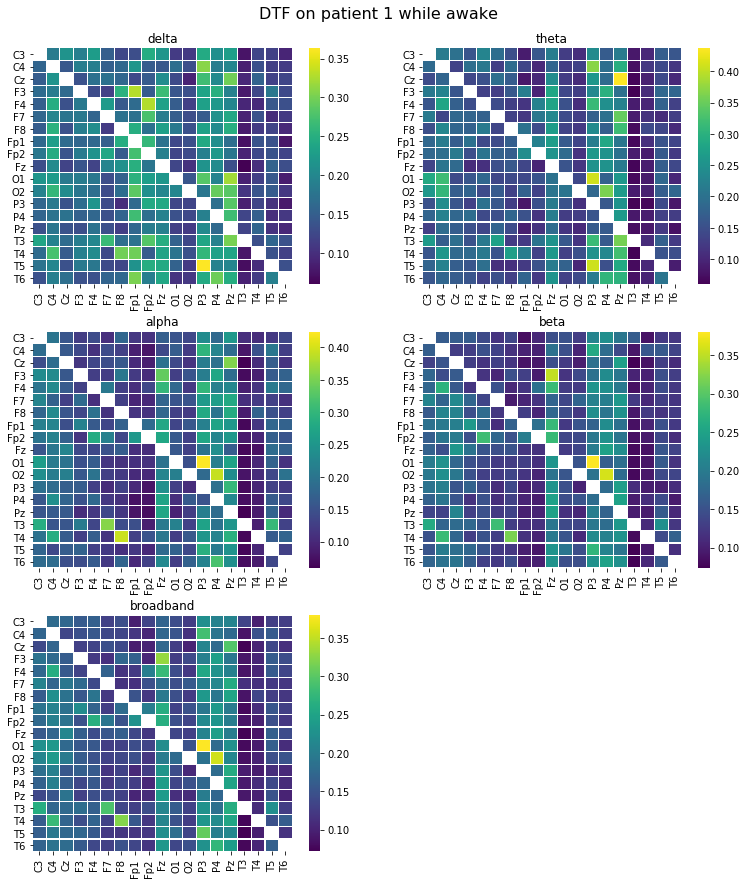

In [42]:
CM.plot_fbands_hmaps(measure='DTF')

In [44]:
CM.DTF

{'delta': array([[0.52351283, 0.18491306, 0.21615377, 0.1901172 , 0.22679135,
         0.15089986, 0.1239438 , 0.1320825 , 0.24634107, 0.2197953 ,
         0.11242538, 0.10967343, 0.24436463, 0.2094889 , 0.2284102 ,
         0.07530485, 0.1236022 , 0.11855715, 0.0914328 ],
        [0.15712071, 0.56593879, 0.14213516, 0.18837603, 0.18872529,
         0.15144576, 0.16294899, 0.21911336, 0.14647337, 0.14372522,
         0.16808921, 0.13301852, 0.30930283, 0.18764291, 0.19966203,
         0.08692692, 0.13400274, 0.11624721, 0.11200138],
        [0.1481839 , 0.21635583, 0.53644979, 0.13686005, 0.17240065,
         0.1732882 , 0.16034128, 0.12839551, 0.14605555, 0.2077236 ,
         0.12827146, 0.08910789, 0.26969729, 0.20456072, 0.29770338,
         0.09371801, 0.15531563, 0.1197197 , 0.12344365],
        [0.16430501, 0.18655981, 0.16372432, 0.38786404, 0.12962827,
         0.11878425, 0.25350648, 0.32945735, 0.1469627 , 0.26717659,
         0.14079933, 0.13386692, 0.23688074, 0.25119617, 0

In [69]:
pickle.dump(CM, open('test.pickle', 'wb'))

In [70]:
asdf = pickle.load(open('test.pickle', 'rb'))

c:\program files\python37\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


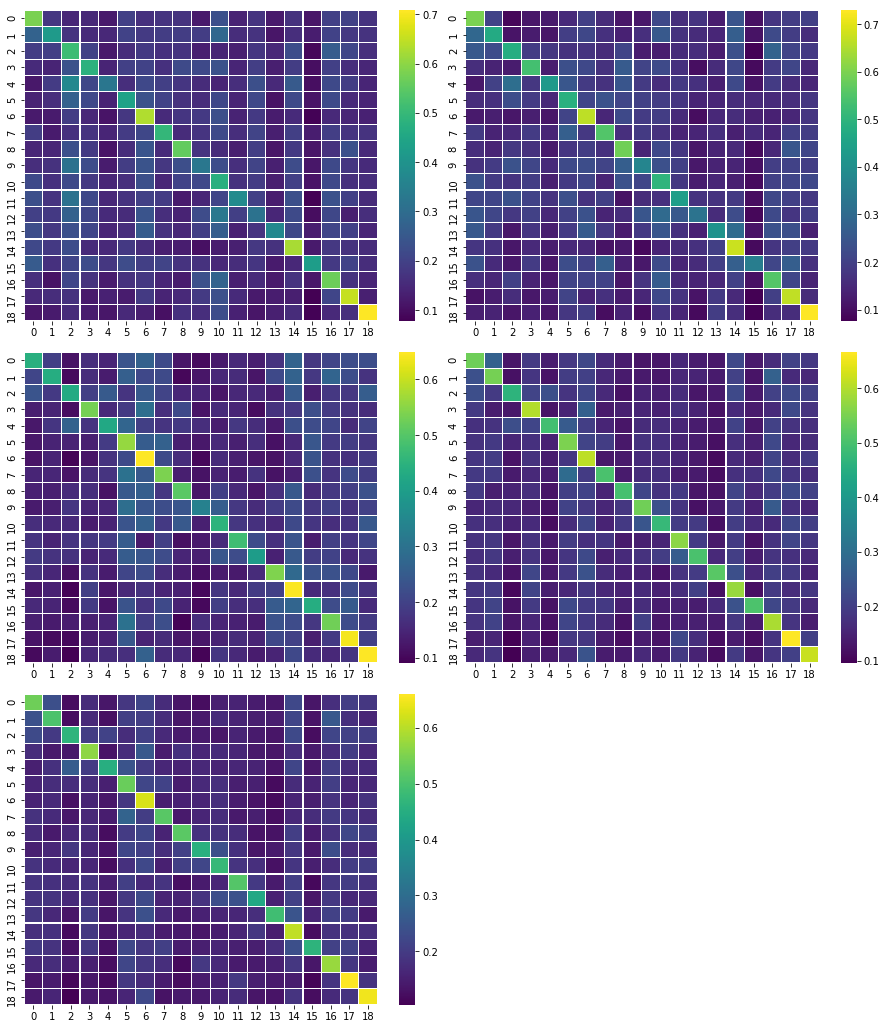

In [93]:
fig = plt.figure(figsize=[2*6.4, 3*4.8], tight_layout=True)
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)


sns.heatmap(CM.DTF['delta'], linewidth=0.1, cmap='viridis', ax=ax1)
sns.heatmap(CM.DTF['theta'], linewidth=0.1, cmap='viridis', ax=ax2)
sns.heatmap(CM.DTF['alpha'], linewidth=0.1, cmap='viridis', ax=ax3)
sns.heatmap(CM.DTF['beta'], linewidth=0.1, cmap='viridis', ax=ax4)
sns.heatmap(CM.DTF['broadband'], linewidth=0.1, cmap='viridis', ax=ax5)

plt.show()

In [77]:
asdf.DTF.keys()

dict_keys(['delta', 'theta', 'alpha', 'beta', 'broadband'])

In [40]:
asdf = CM.Connectivity(measure='wpli')

In [41]:
asdf

{'delta': array([[0.        , 0.39979864, 0.42634047, 0.3117556 , 0.40320727,
         0.44933337, 0.35573098, 0.42555589, 0.4275114 , 0.35474728,
         0.32402132, 0.3881882 , 0.38075455, 0.43062206, 0.36299598,
         0.26088374, 0.50581424, 0.39854755, 0.36910868],
        [0.39979864, 0.        , 0.60193253, 0.38506425, 0.53644787,
         0.33562889, 0.34515935, 0.33847413, 0.48502975, 0.48088159,
         0.42850795, 0.44039367, 0.51625041, 0.28207442, 0.28643097,
         0.27753706, 0.52912395, 0.4168384 , 0.4360363 ],
        [0.42634047, 0.60193253, 0.        , 0.55974579, 0.5159981 ,
         0.34349526, 0.47797925, 0.27607661, 0.45664599, 0.22528624,
         0.47364372, 0.24503911, 0.51524968, 0.55221559, 0.47570971,
         0.55910313, 0.58647475, 0.52294173, 0.40610802],
        [0.3117556 , 0.38506425, 0.55974579, 0.        , 0.61009995,
         0.40065181, 0.23229322, 0.35083776, 0.31546732, 0.41587341,
         0.26379477, 0.48902372, 0.47105854, 0.29056979, 0

In [36]:
CM.fit_quality

,REV mean,REV std,REV max,REV min
0,0.000005,0.000005,0.000058,2.549159e-08
1,0.000003,0.000003,0.000040,4.543830e-08
2,0.000002,0.000002,0.000028,2.075557e-08
3,0.000005,0.000006,0.000056,1.636417e-07
4,0.000002,0.000002,0.000026,1.524263e-08
5,0.000004,0.000004,0.000057,6.368913e-08
6,0.000004,0.000004,0.000054,1.131248e-07
7,0.000003,0.000003,0.000043,2.408892e-08
8,0.000005,0.000005,0.000047,1.370969e-07
9,0.000004,0.000004,0.000044,1.485697e-07


In [49]:
np.nanmin(to_plot)

0.3077959644254676

In [52]:
np.nanmax(to_plot)

0.7614603403970679

In [50]:
to_plot

array([[       nan, 0.48403623, 0.42843094, 0.43757804, 0.4164107 ,
        0.43269756, 0.52073747, 0.4345294 , 0.40833756, 0.44789053,
        0.50111486, 0.41342172, 0.51964085, 0.57632907, 0.37342515,
        0.40350564, 0.43155793, 0.43725652, 0.50387866],
       [0.48403623,        nan, 0.46913975, 0.46956578, 0.42976124,
        0.4386893 , 0.4762212 , 0.41585405, 0.4610401 , 0.4441416 ,
        0.53552955, 0.41599961, 0.53554812, 0.5605836 , 0.41196481,
        0.47445885, 0.43375084, 0.47700045, 0.50775004],
       [0.42843094, 0.46913975,        nan, 0.44843264, 0.48671279,
        0.52551128, 0.47896089, 0.53662097, 0.46022278, 0.42462902,
        0.56747185, 0.37676576, 0.58339395, 0.45629571, 0.41283777,
        0.49771839, 0.47574983, 0.41476227, 0.427864  ],
       [0.43757804, 0.46956578, 0.44843264,        nan, 0.49763557,
        0.58411036, 0.4519771 , 0.587638  , 0.50389145, 0.48396877,
        0.55342045, 0.40249775, 0.43236237, 0.44564035, 0.41215039,
        0.509

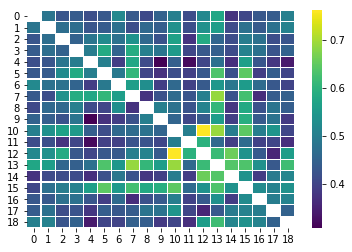

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

to_plot = asdf['broadband']
np.fill_diagonal(to_plot, np.nan)
ax = sns.heatmap(to_plot, linewidth=0.1, cmap='viridis')
plt.show()

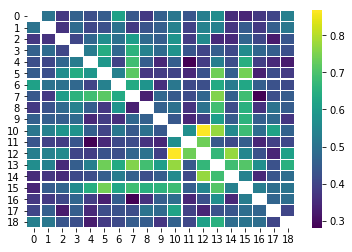

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

to_plot = asdf['beta']
np.fill_diagonal(to_plot, np.nan)
ax = sns.heatmap(to_plot, linewidth=0.1, cmap='viridis')
plt.show()

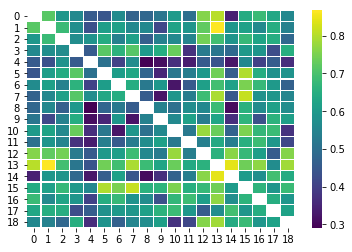

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

to_plot = asdf['alpha']
np.fill_diagonal(to_plot, np.nan)
ax = sns.heatmap(to_plot, linewidth=0.1, cmap='viridis')
plt.show()

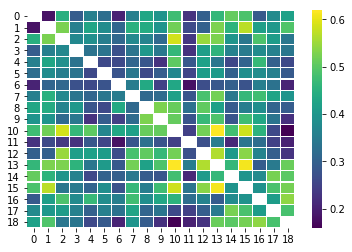

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

to_plot = asdf['theta']
np.fill_diagonal(to_plot, np.nan)
ax = sns.heatmap(to_plot, linewidth=0.1, cmap='viridis')
plt.show()

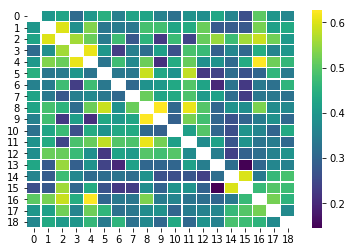

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

to_plot = asdf['delta']
np.fill_diagonal(to_plot, np.nan)
ax = sns.heatmap(to_plot, linewidth=0.1, cmap='viridis')
plt.show()